
# Chapter 2 — Image Classification with YOLO‑CLS (VehicleType Dataset)
Course: Special Topics in Mechatronics Engineering – AI Computer Vision
Instructor: Dr. Mohammad Al‑Khawaldah

This notebook is ready for students.
Training is done directly from Google Drive dataset.
Dataset link:
https://drive.google.com/drive/folders/1PCy1cUkA_u6CahBJ5OBYUE5Iun0OnAY5



1️⃣ Learning Objectives
• Understand image classification
• Train YOLO‑CLS on VehicleType
• Evaluate results
• Run inference



2️⃣ Dataset Description
VehicleType dataset contains real images divided into:
train / valid / test
Each folder contains vehicle classes.



3️⃣ Mount Google Drive


In [1]:

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Prepare and Inspect Dataset

Checking dataset path...
✅ Dataset Found!
✅ Train / Valid / Test OK

📚 Classes Found:
 - Cars
 - Crossovers
 - MiniVan
 - SUVs
 - Trucks

🖼 Showing sample images...


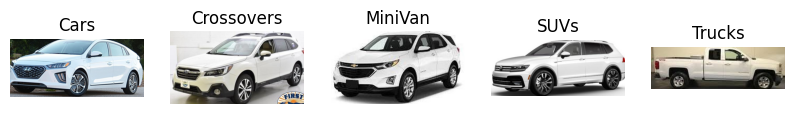


✅ Dataset is READY for YOLO Classification Training


In [15]:
# ============================================================
# CHAPTER 2 — DATASET CHECK (Guaranteed Working Cell)
# ============================================================

import os
import random
from PIL import Image
import matplotlib.pyplot as plt

DATASET_PATH = "/content/drive/MyDrive/A__Computer_Vision/Vehicle_Type"

print("Checking dataset path...")

assert os.path.exists(DATASET_PATH), "❌ Dataset path NOT found!"
print("✅ Dataset Found!")

splits = ["train", "valid", "test"]

for s in splits:
    split_path = os.path.join(DATASET_PATH, s)
    assert os.path.exists(split_path), f"❌ Missing split: {s}"

print("✅ Train / Valid / Test OK")

# ------------------------------------------------------------
# Show classes
# ------------------------------------------------------------
train_path = os.path.join(DATASET_PATH, "train")
classes = sorted(os.listdir(train_path))
print("\n📚 Classes Found:")
for c in classes:
    print(" -", c)

# ------------------------------------------------------------
# Show random images
# ------------------------------------------------------------
print("\n🖼 Showing sample images...")

plt.figure(figsize=(10,6))

for i, c in enumerate(classes[:5]):
    class_path = os.path.join(train_path, c)
    img_file = random.choice(os.listdir(class_path))
    img_path = os.path.join(class_path, img_file)

    img = Image.open(img_path)

    plt.subplot(1,5,i+1)
    plt.imshow(img)
    plt.title(c)
    plt.axis("off")

plt.show()

print("\n✅ Dataset is READY for YOLO Classification Training")



Add shortcut of dataset folder to MyDrive then set path below.



6️⃣ Install YOLO


In [16]:

!pip install ultralytics -q
from ultralytics import YOLO



7️⃣ Train YOLO‑CLS


In [17]:

model = YOLO("yolo11n-cls.pt")
model.train(data=DATASET_PATH, epochs=30, imgsz=224, batch=32)


Ultralytics 8.4.14 🚀 Python-3.12.12 torch-2.9.0+cu128 CUDA:0 (Tesla T4, 14913MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/A__Computer_Vision/Vehicle_Type, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=224, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n-cls.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=train3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=Tr

ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f0c5670ab40>
curves: []
curves_results: []
fitness: 0.8719512224197388
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.7439024448394775, 'metrics/accuracy_top5': 1.0, 'fitness': 0.8719512224197388}
save_dir: PosixPath('/content/runs/classify/train3')
speed: {'preprocess': 0.06012300000071352, 'inference': 0.5997850853668196, 'loss': 0.0002407439019518234, 'postprocess': 0.0007232317063714684}
task: 'classify'
top1: 0.7439024448394775
top5: 1.0

"Loss tells us how well the model is learning during training,
but Confusion Matrix tells us where it fails in the real world."


8️⃣ Evaluate



9️⃣ Inference


✅ Test images: 41
✅ Test Top-1 Accuracy: 73.17%


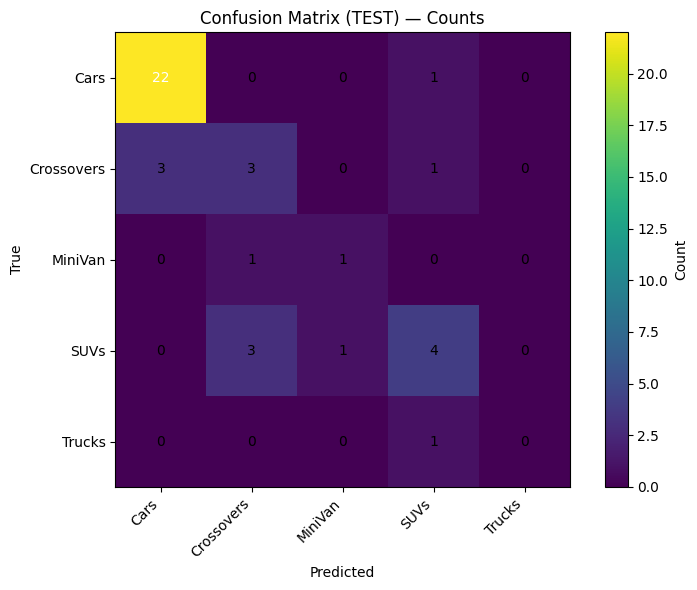

/tmp/ipython-input-2920932334.py:102: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2920932334.py:102: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


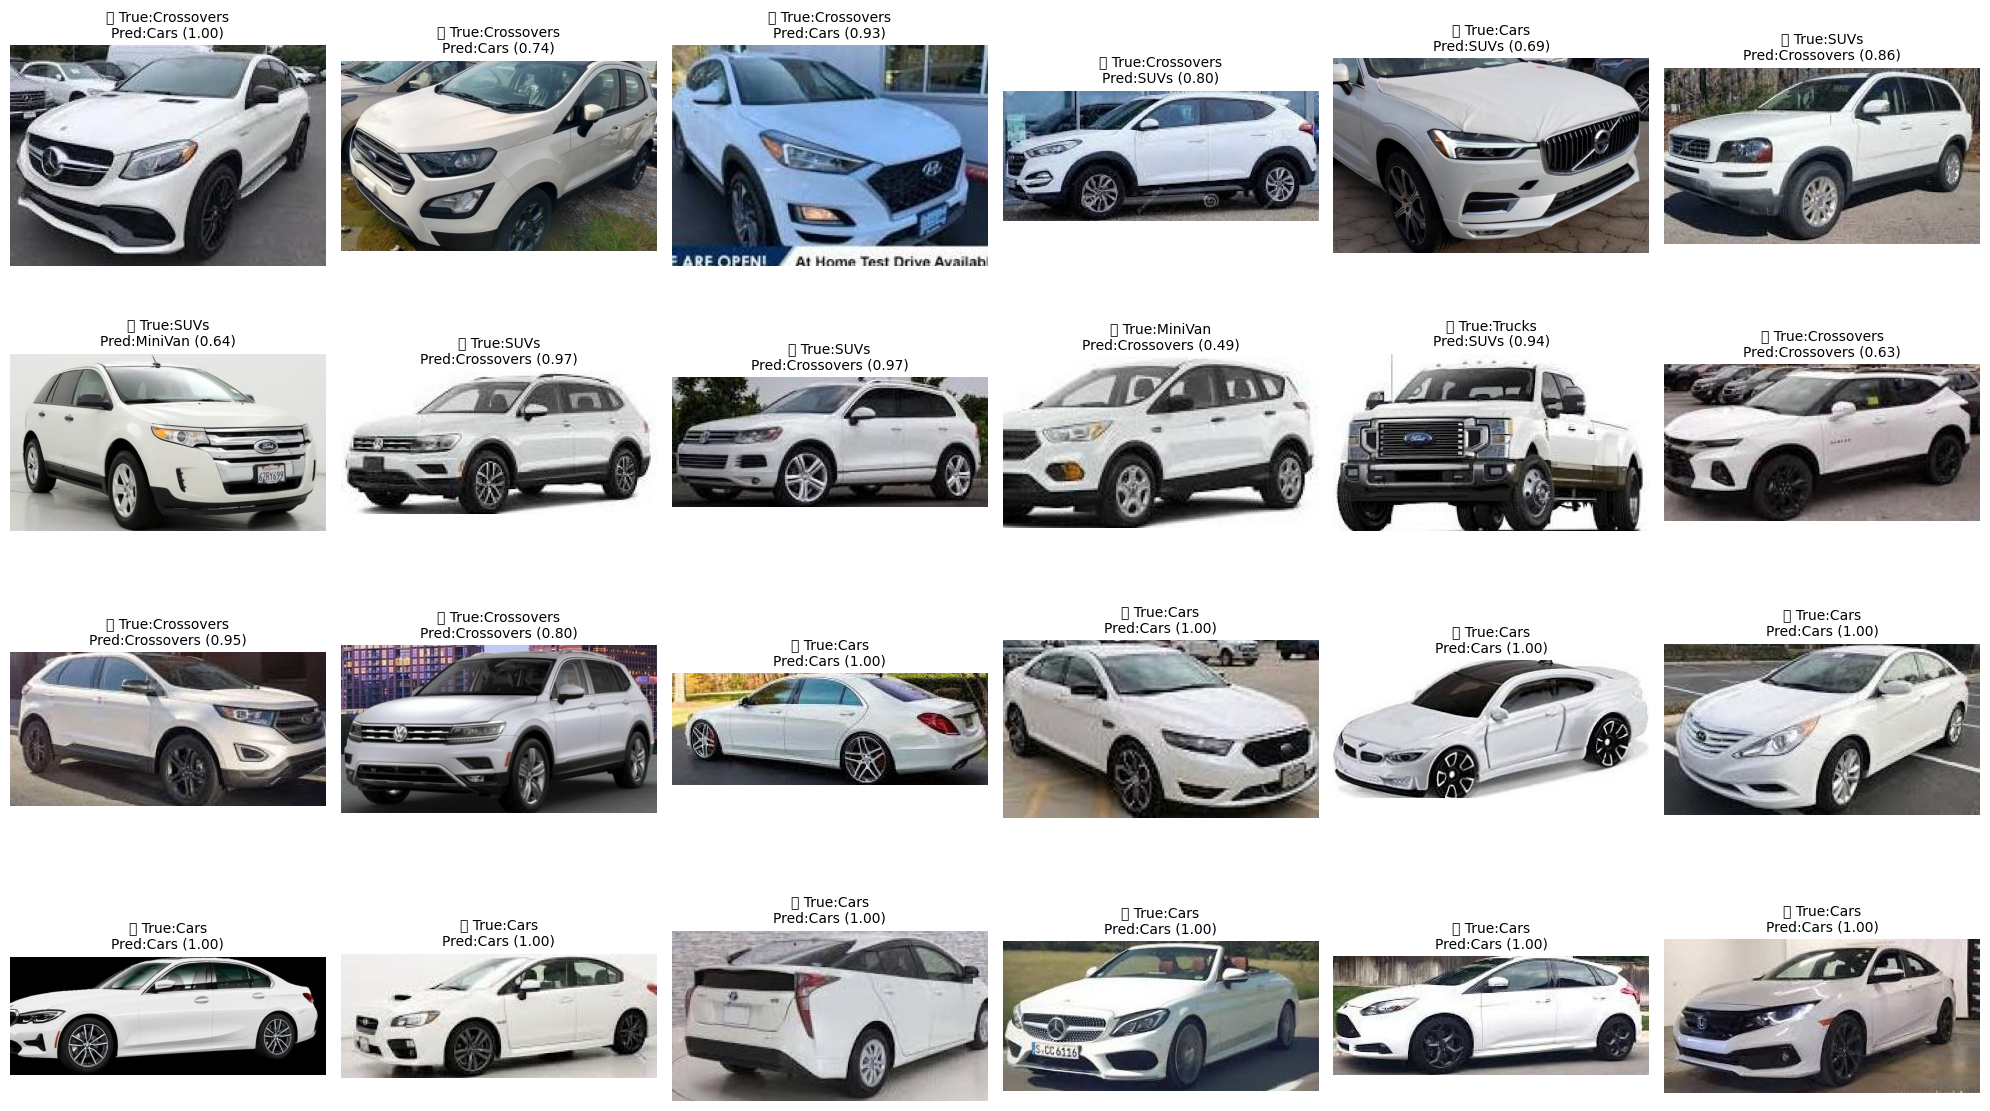


Top confusions (TEST) — counts:
 1. True=SUVs         Pred=Crossovers    Count=3
 2. True=Crossovers   Pred=Cars          Count=3
 3. True=Trucks       Pred=SUVs          Count=1
 4. True=SUVs         Pred=MiniVan       Count=1
 5. True=MiniVan      Pred=Crossovers    Count=1
 6. True=Crossovers   Pred=SUVs          Count=1
 7. True=Cars         Pred=SUVs          Count=1


In [21]:
# =========================
# TEST (Traditional): Accuracy + Confusion Matrix + Visual Examples
# =========================
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import random

# ----- config -----
TEST_DIR = Path(DATASET_PATH) / "test"
IMG_SIZE = 224
SHOW_N = 24          # how many images to visualize
SHOW_WRONG_FIRST = True

# ----- class names -----
names = list(model.names.values()) if isinstance(model.names, dict) else list(model.names)
name_to_idx = {n:i for i,n in enumerate(names)}
n = len(names)

# ----- collect test images with true labels from folders -----
items = []
for cls_dir in TEST_DIR.iterdir():
    if cls_dir.is_dir():
        true_label = cls_dir.name
        for img_path in cls_dir.glob("*.jpg"):
            items.append((img_path, true_label))

assert len(items) > 0, "No test images found in test/ subfolders."

# ----- run inference on all test images -----
paths = [p for p,_ in items]
preds = model.predict(paths, imgsz=IMG_SIZE, verbose=False)

# ----- build confusion matrix (counts) -----
cm = np.zeros((n, n), dtype=int)
correct = 0
records = []  # for visualization

for (img_path, true_label), p in zip(items, preds):
    top1 = int(p.probs.top1)
    conf = float(p.probs.top1conf)
    pred_label = p.names[top1]

    # map labels to indices (in case folder name case differs)
    t = name_to_idx.get(true_label, None)
    pr = name_to_idx.get(pred_label, None)

    if t is not None and pr is not None:
        cm[t, pr] += 1

    ok = (pred_label.lower() == true_label.lower())
    correct += int(ok)
    records.append((img_path, true_label, pred_label, conf, ok))

acc = correct / len(records)
print(f"✅ Test images: {len(records)}")
print(f"✅ Test Top-1 Accuracy: {acc*100:.2f}%")

# ----- plot classic confusion matrix (counts + numbers) -----
plt.figure(figsize=(8,6))
plt.imshow(cm, interpolation="nearest")
plt.title("Confusion Matrix (TEST) — Counts")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.xticks(range(n), names, rotation=45, ha="right")
plt.yticks(range(n), names)
plt.colorbar(label="Count")

maxv = cm.max() if cm.size else 0
thresh = maxv * 0.5
for i in range(n):
    for j in range(n):
        v = cm[i, j]
        plt.text(j, i, str(v),
                 ha="center", va="center",
                 color="white" if v > thresh else "black",
                 fontsize=10)

plt.tight_layout()
plt.show()

# ----- visualize examples (wrong first is more educational) -----
wrong = [r for r in records if not r[4]]
right = [r for r in records if r[4]]

if SHOW_WRONG_FIRST and len(wrong) > 0:
    sample = wrong[:SHOW_N] if len(wrong) >= SHOW_N else wrong + right[:(SHOW_N-len(wrong))]
else:
    sample = random.sample(records, min(SHOW_N, len(records)))

rows, cols = 4, 6
plt.figure(figsize=(20, 12))

for i, (img_path, true_label, pred_label, conf, ok) in enumerate(sample, 1):
    tag = "✅" if ok else "❌"
    plt.subplot(rows, cols, i)
    plt.imshow(Image.open(img_path))
    plt.title(f"{tag} True:{true_label}\nPred:{pred_label} ({conf:.2f})", fontsize=10)
    plt.axis("off")

plt.tight_layout()
plt.show()

# ----- print top 10 mistakes (counts) -----
mistakes = []
for i, tname in enumerate(names):
    for j, pname in enumerate(names):
        if i != j and cm[i, j] > 0:
            mistakes.append((cm[i, j], tname, pname))
mistakes.sort(reverse=True)

print("\nTop confusions (TEST) — counts:")
for k, (cnt, t, p) in enumerate(mistakes[:10], 1):
    print(f"{k:>2}. True={t:<12} Pred={p:<12}  Count={cnt}")


In [9]:
import os

base = "/content/drive/MyDrive/A__Computer_Vision/Test Videos"
print("Files in folder:\n", os.listdir(base))


Files in folder:
 ['grok-video-e592a1be-c3fe-4423-aaa4-903551054761.mp4', '8d2fc594-e44c-4eb5-8db3-d290e44d4ed7.mp4']


In [20]:
from google.colab import drive
drive.mount('/content/drive')

import os, cv2, time
from ultralytics import YOLO
from IPython.display import display, clear_output

VIDEO = "/content/drive/MyDrive/A__Computer_Vision/Test Videos/8d2fc594-e44c-4eb5-8db3-d290e44d4ed7.mp4"
MODEL = "/content/runs/classify/train3/weights/best.pt"

assert os.path.exists(VIDEO), f"Video not found: {VIDEO}"
assert os.path.exists(MODEL), f"Model not found: {MODEL}"

model = YOLO(MODEL)

cap = cv2.VideoCapture(VIDEO)
assert cap.isOpened(), "Cannot open video (path/codec issue)."

# If live view is slow, set to 2 or 3
SHOW_EVERY_N = 1

i = 0
t0 = time.time()

while True:
    ret, frame = cap.read()
    if not ret:
        break

    i += 1
    if i % SHOW_EVERY_N != 0:
        continue

    img = cv2.resize(frame, (224, 224))

    r = model.predict(img, verbose=False)[0]
    names = r.names

    top1 = int(r.probs.top1)
    top1conf = float(r.probs.top1conf)

    # Overlay Top-1
    cv2.putText(frame, f"Top-1: {names[top1]} ({top1conf:.2f})",
                (30, 55), cv2.FONT_HERSHEY_SIMPLEX, 1.2, (0,255,0), 3)

    # Overlay Top-5
    y = 100
    for k, (idx, cf) in enumerate(zip(r.probs.top5, r.probs.top5conf), start=1):
        cv2.putText(frame, f"Top-{k}: {names[int(idx)]} ({float(cf):.2f})",
                    (30, y), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255,255,0), 2)
        y += 32

    display(frame[..., ::-1])   # BGR->RGB
    clear_output(wait=True)

cap.release()

dt = time.time() - t0
print(f"✅ Done. Displayed frames: {i//SHOW_EVERY_N}, time: {dt:.1f}s")


✅ Done. Displayed frames: 145, time: 26.4s


Ultralytics 8.4.14 🚀 Python-3.12.12 torch-2.9.0+cu128 CUDA:0 (Tesla T4, 14913MiB)
YOLO11n-cls summary (fused): 47 layers, 1,532,429 parameters, 0 gradients, 3.2 GFLOPs
train: /content/drive/MyDrive/A__Computer_Vision/Vehicle_Type/train... found 286 images in 5 classes ✅ 
val: /content/drive/MyDrive/A__Computer_Vision/Vehicle_Type/valid... found 82 images in 5 classes ✅ 
test: /content/drive/MyDrive/A__Computer_Vision/Vehicle_Type/test... found 41 images in 5 classes ✅ 
val: Fast image access ✅ (ping: 0.4±0.1 ms, read: 16.2±11.9 MB/s, size: 33.0 KB)
val: Scanning /content/drive/MyDrive/A__Computer_Vision/Vehicle_Type/valid... 82 images, 0 corrupt: 100% ━━━━━━━━━━━━ 82/82 20.2Mit/s 0.0s
               classes   top1_acc   top5_acc: 100% ━━━━━━━━━━━━ 6/6 3.6it/s 1.7s
                   all      0.744          1
Speed: 0.7ms preprocess, 4.4ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to /content/runs/classify/val
✅ Validation results saved in: /content/runs/classify/

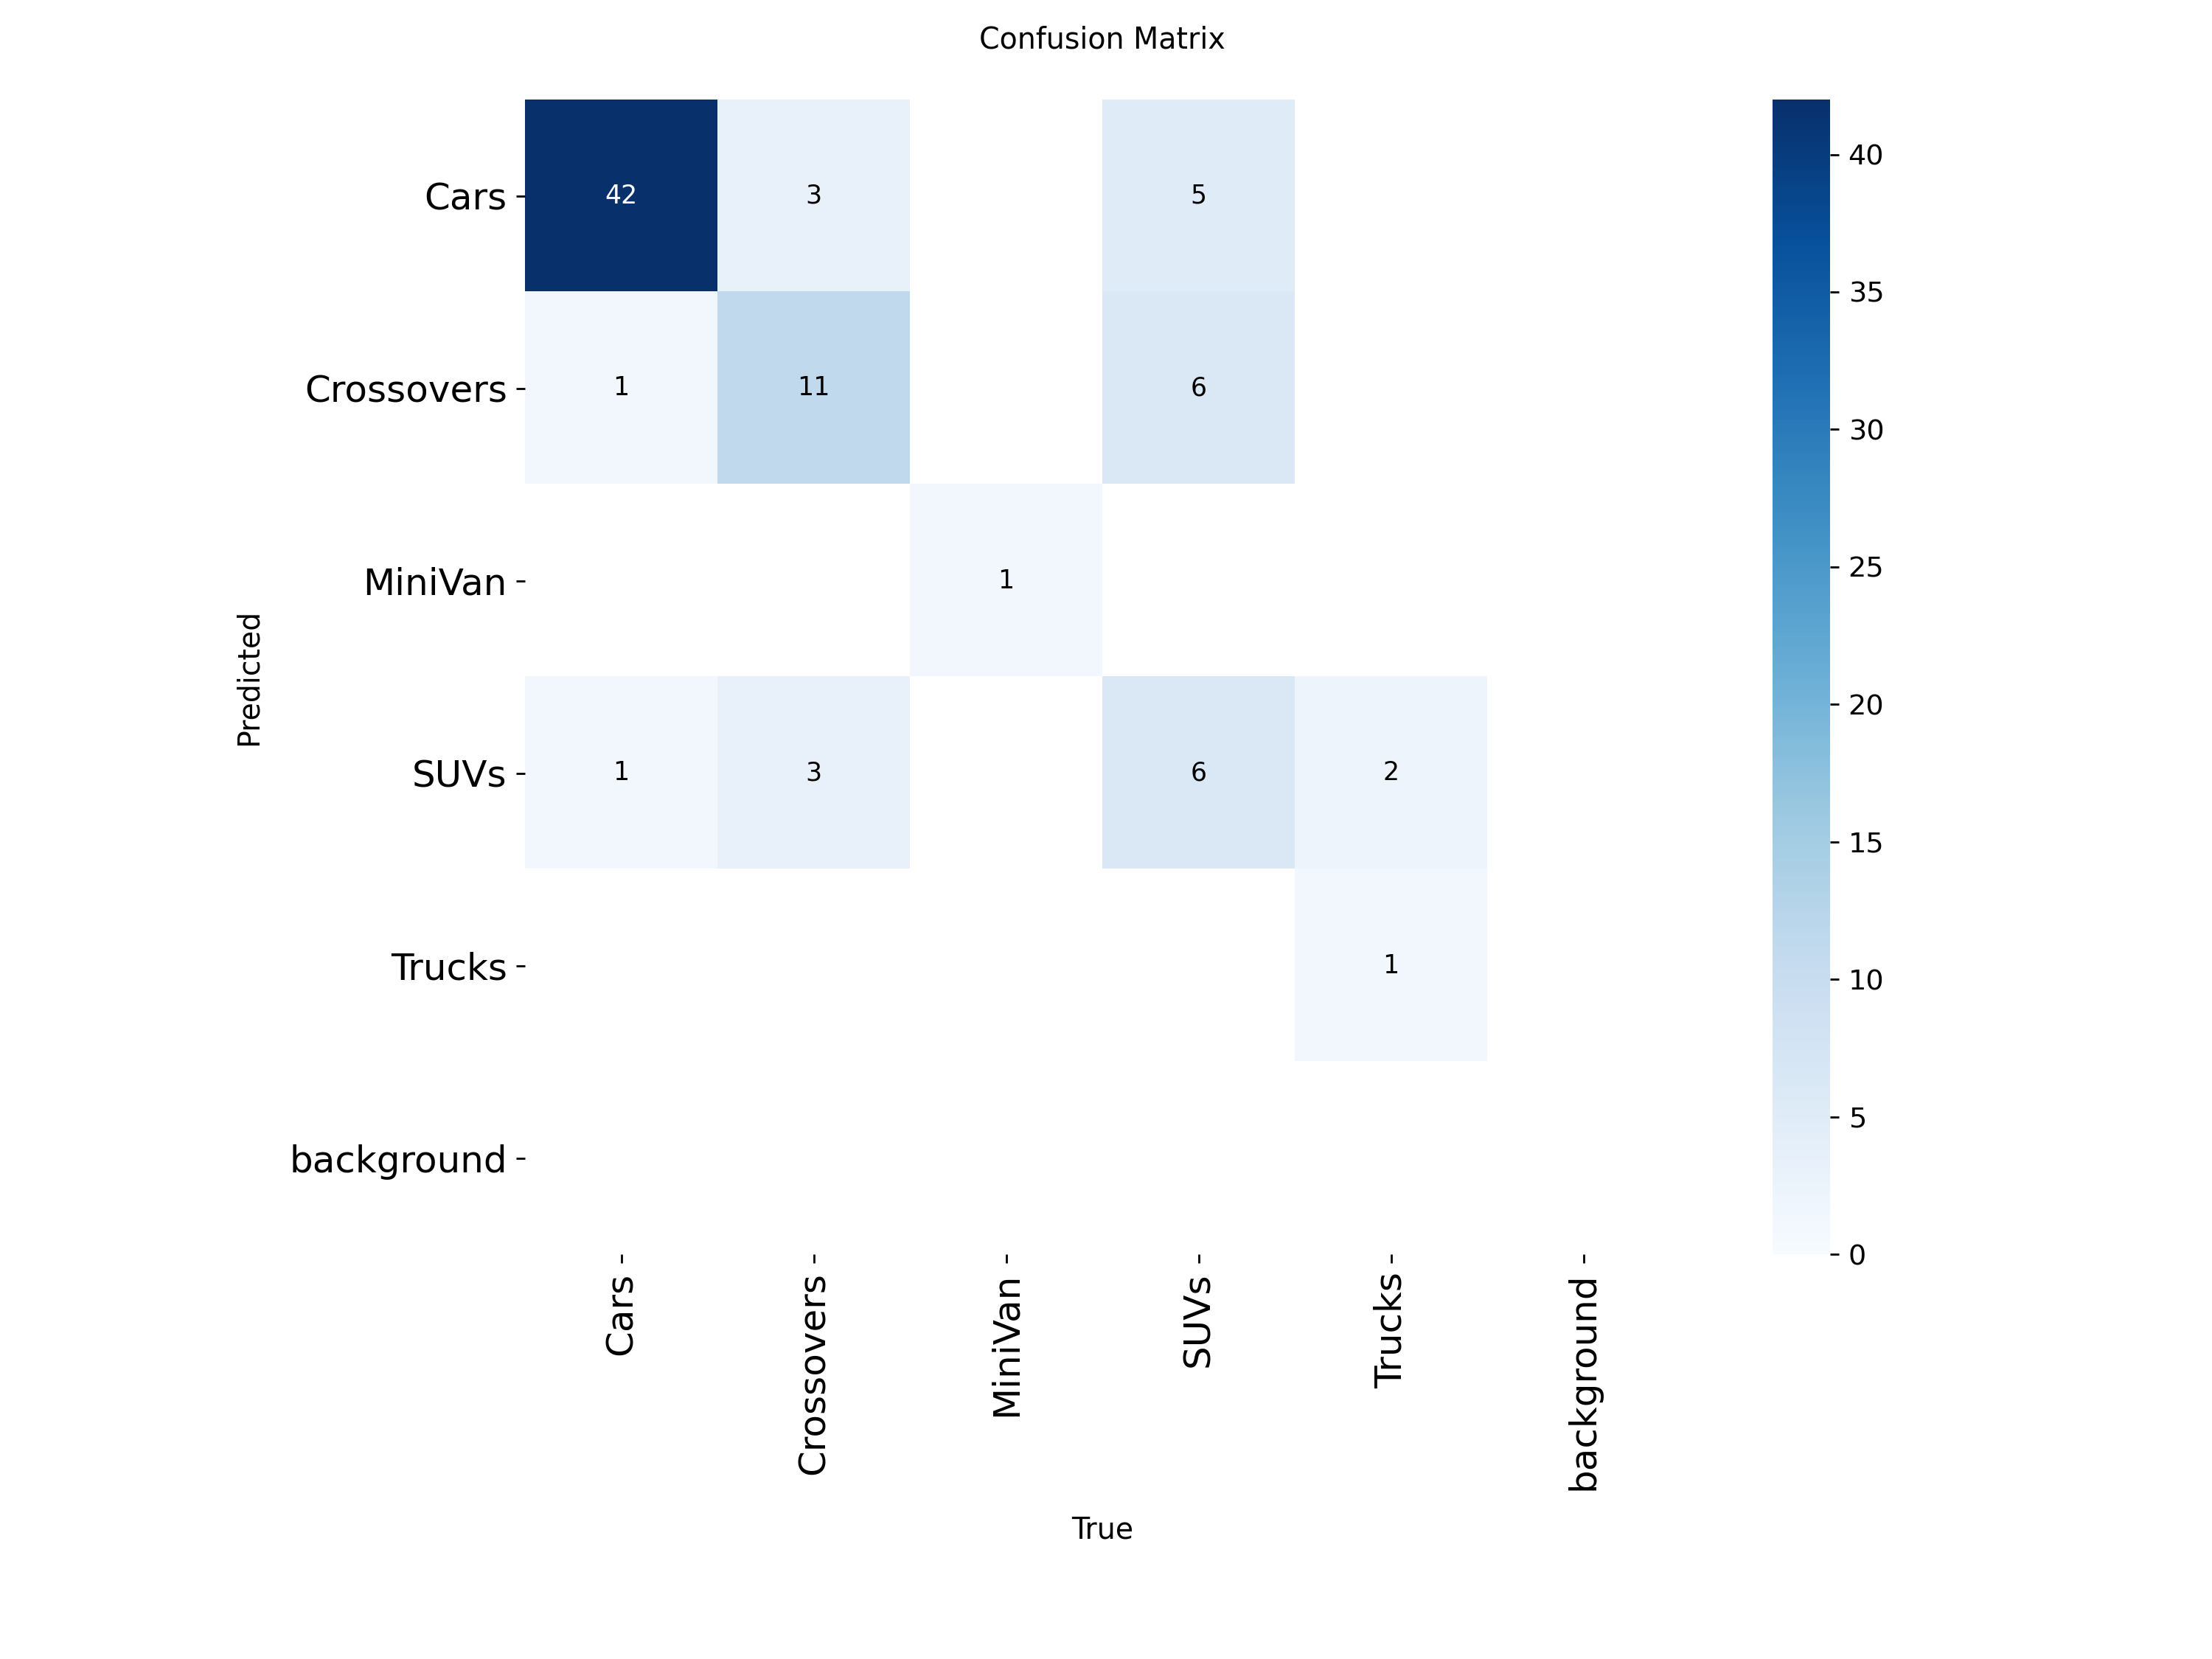


--- Normalized (%) ---



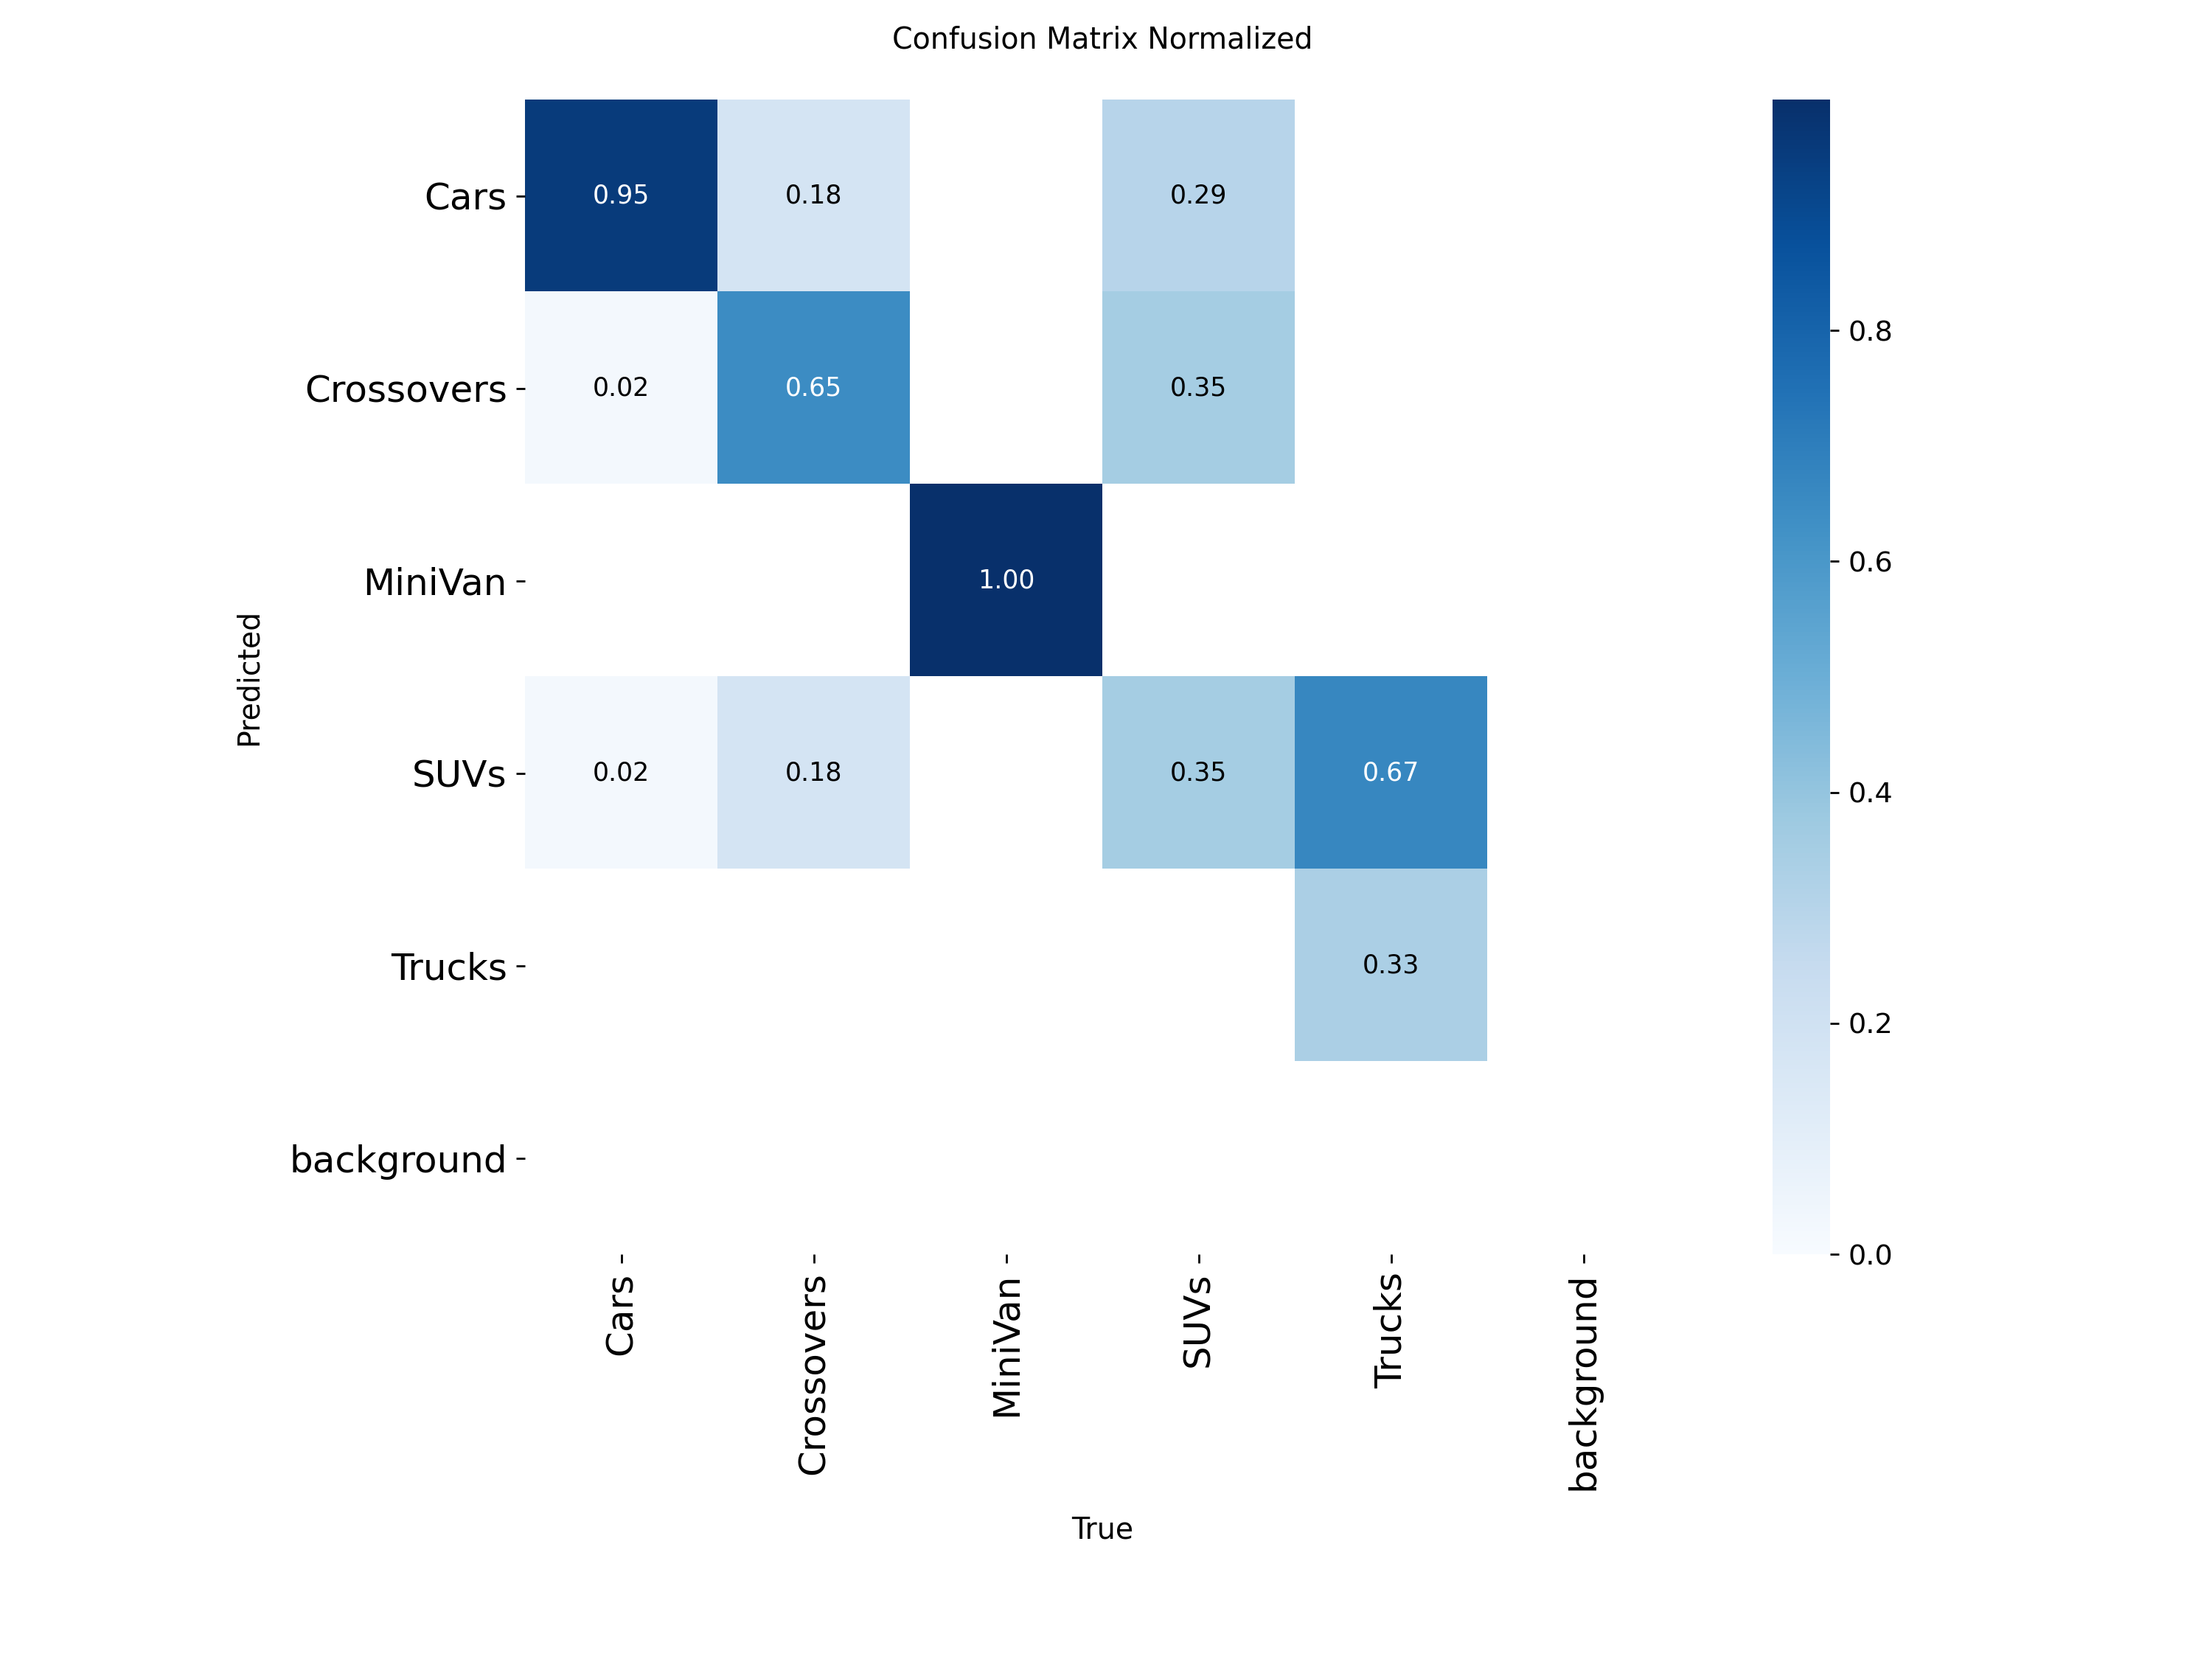

In [22]:
from ultralytics import YOLO
from PIL import Image
import os

BEST = "/content/runs/classify/train3/weights/best.pt"
DATA = "/content/drive/MyDrive/A__Computer_Vision/Vehicle_Type"  # نفس مسار الداتا لديك

model = YOLO(BEST)

# Run validation (this creates a NEW val run folder and writes confusion_matrix.png there)
metrics = model.val(data=DATA, split="val", imgsz=224)

print("✅ Validation results saved in:", metrics.save_dir)

cm_path  = os.path.join(metrics.save_dir, "confusion_matrix.png")
cmn_path = os.path.join(metrics.save_dir, "confusion_matrix_normalized.png")

print("CM path:", cm_path)
print("CM norm path:", cmn_path)

assert os.path.exists(cm_path), "confusion_matrix.png not found. Something wrong with save_dir."

display(Image.open(cm_path))
print("\n--- Normalized (%) ---\n")
display(Image.open(cmn_path))
